ALIFI LAZUARDI GUNAWAN

BLITAR JAWA TIMUR

## Import Library

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Koneksi ke google drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Membaca data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/WineQT.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## exploratory data analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


dataset terdiri dari 1143 data dengan 11 fitur, target, dan Id

Semakin tinggi kelas dari target semakin baik kulaitas dari wine

*   fixed acidity: Kandungan asam non volatil seperti asam sitrat, malat, dan tartarat yang menyebabkan rasa asam pada anggur. Jenis asam ini memadukan keharmonisan rasa anggur dan menambah kesegaran.
*   volatile acidity: kandungan asam volatil (atau gas) dalam anggur. Asam volatil utama dalam anggur adalah asam asetat, yang memberi bau dan rasa cuka.
*   citric acid: kandungan asam citric, salah satu asam yang kurang umum ditemukan dalam anggur. Asam adalah senyawa organik lemah yang umumnya ditemukan dalam jumlah besar dalam buah jeruk seperti jeruk dan limau. Jumlah asam sitrat yang ditemukan dalam anggur kecil, masih mencapai 5% dari total kandungan asam dalam anggur.
*   residual sugar: kadar gula anggur alami yang tersisa dalam anggur setelah fermentasi alkohol selesai. Semakin banyak sisa gula yang tersisa dalam anggur, semakin manis anggur itu.
*   chlorides: jumlah mineral dalam anggur juga memengaruhi strukturnya. Konten mereka sebagian besar dipengaruhi oleh wilayah iklim, prosedur,  penyimpanan anggur, dan penuaan.
*   free sulfur dioxide: kandungan sulfur dioxide yang ditambahkan. Dalam industri anggur, sulfur dioksida (SO2) sering ditambahkan ke must dan jus sebagai pengawet untuk mencegah pertumbuhan bakteri dan memperlambat proses oksidasi dengan menghambat enzim oksidatif.
*   total sulfur dioxide: Total bagian dari SO2 yang bebas dalam anggur ditambah bagian yang terikat dengan bahan kimia lain dalam anggur seperti aldehida, pigmen, atau gula. kerapatan: massa satuan volume suatu zat material. Rumus kerapatan adalah d = M/V, di mana d adalah kerapatan, M adalah massa, dan V adalah volume.
*   pH: Derajat keasaman dari anggur. Kisaran pH optimal untuk semua anggur adalah antara 2,9 dan 4,2. Anggur yang lebih asam memiliki nilai pH yang lebih rendah; anggur yang kurang asam memiliki nilai pH yang lebih tinggi.
*   sulphates: Kandungan Sulfat yang merupakan produk sampingan dari gula anggur yang difermentasi oleh ragi menjadi alkohol.
*   alcohol: kandungan alkohol dalam anggur. Persentase alkohol anggur dipengaruhi oleh berbagai faktor, termasuk varietas anggur, kandungan gula berry, metode pembuatan, dan lingkungan pertumbuhan.

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


rentang data masih sangat beragam/tidak sama dalam setiap fitur

In [ ]:
  data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Tidak ada missing value yang ditemukan

In [ ]:
data.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


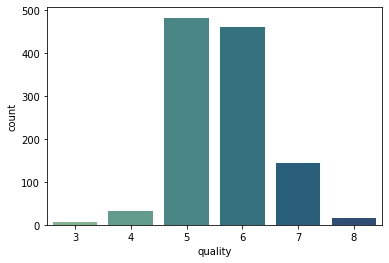

In [ ]:
sns.countplot(data['quality'], palette = 'crest')

Melihat jumlah target dari tiap kelas. Terihat perbedaan jumlah yang sangat jauh antar kelas di dalam dataset/terjadi imbalance data.

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


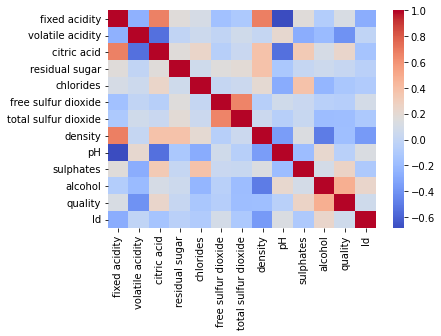

In [ ]:
data['quality'] = data['quality'].astype('int') 
corr = data.corr() 
sns.heatmap(corr, cmap='coolwarm')
print(corr['quality'].sort_values(ascending = False))

terdapat korelasi positif yang kuat antara kualitas dengan kadar alkohol. Sementara itu terdapat korelasi negatif yang kuat antara kualitas dan volatile acidity

## Data preprocessing

In [ ]:
#menghapus kolom id

data = data.drop(['Id'], axis=1)

In [ ]:
#memisahkan fitur dan target

features = data.drop(columns=["quality"], axis=1)
target = data["quality"] 

In [ ]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [ ]:
target

1       5
2       5
3       6
5       5
6       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 904, dtype: int64

In [ ]:
#melakukan oversample untuk mengatasi imbalance data

oversample = SMOTE()
X, Y = oversample.fit_resample(features, target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


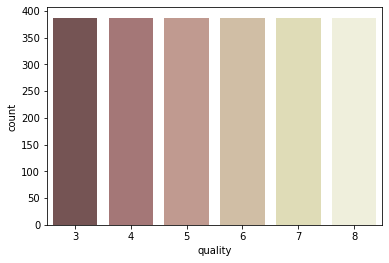

In [ ]:
sns.countplot(Y, palette = 'pink')

Setiap kelas dalam target mempunyai jumlah yang sama

In [ ]:
#Melakukan scaling pada fitur untuk menyamakan rentang data

scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.28318584, 0.50704225, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.42253521, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       [0.5840708 , 0.08450704, 0.56      , ..., 0.33070866, 0.1497006 ,
        0.21538462],
       ...,
       [0.27284016, 0.22178038, 0.33690134, ..., 0.36952439, 0.30404136,
        0.57529469],
       [0.57388859, 0.11946454, 0.60496775, ..., 0.18755769, 0.28333294,
        0.28013072],
       [0.61334268, 0.11287397, 0.6336393 , ..., 0.16852241, 0.27863803,
        0.26599894]])

In [ ]:
#Melakukan pemecahan dataset menjadi data training dan data testing 

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

##Machine learninng model

In [ ]:
RF = RandomForestClassifier()
parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(RF, parameters, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Model yang digunakan adalah random forest classifier. Untuk mencari hyperparameter terbaik digunakan GridSearchCV.

In [ ]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Diperoleh hyperparameter terbaik seperti di atas

In [ ]:
model = RandomForestClassifier(criterion = 'gini', max_depth = 8, max_features = 'auto', n_estimators = 200)
model.fit(X_train, Y_train)
prediksi = model.predict(X_val)

melakukan prediksi dengan model yang telah dilatih dengan hyperparameter terbaik

In [ ]:
print(classification_report(Y_val, prediksi))

              precision    recall  f1-score   support

           3       0.92      1.00      0.96        82
           4       0.88      0.90      0.89        88
           5       0.63      0.60      0.62        73
           6       0.58      0.43      0.49        68
           7       0.85      0.89      0.87        84
           8       0.90      1.00      0.95        70

    accuracy                           0.82       465
   macro avg       0.79      0.80      0.80       465
weighted avg       0.80      0.82      0.81       465



melakukan evaluasi hasil prediksi. Diperoleh model mampu melakukan prediksi dengan akurasi

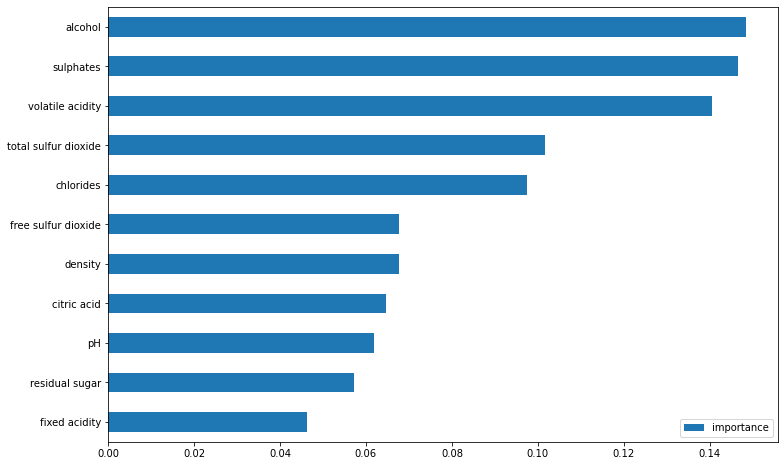

In [ ]:
best_clf = clf.best_estimator_

imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

menemukan fitur yang paling berpengaruh dalam kualitas. 3 fitur yang paling berpengaruh dalam menentukan kualitas adalah Volatile acidity,  alcohol, dan sulphates.